# importing modules

In [109]:
import numpy as np
import tensorflow as tf
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# inception model loading

In [4]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [5]:
weights_file='inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5' # importing weights from a local file

In [6]:
base_model=InceptionV3(input_shape=(256,256,3),include_top=False,weights=None)

In [7]:
base_model.load_weights(weights_file)

In [8]:
base_model.trainable=False

In [9]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

# mobile_net

In [150]:
base_model_mobilenet= tf.keras.applications.MobileNetV2(input_shape=(256,256,3),
                                               include_top=False,
                                               weights='imagenet')

C:\Users\Daksh\Anaconda3\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


9412608/9406464 [==============================] - 10s 1us/step


In [151]:
base_model_mobilenet.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 257, 257, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 128, 128, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 128, 128, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [152]:
last_layer=base_model_mobilenet.get_layer('block_8_project_BN')

In [153]:
last_layer.output_shape

(None, 16, 16, 64)

In [154]:
last_output=last_layer.output

# getting data

In [163]:
train_path='chest_xray/train'
test_path='chest_xray/test'
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.,rotation_range=15,zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)
                                                             
training_data_generator=train_datagen.flow_from_directory(
train_path,
class_mode='binary',
target_size=(256,256),
)

testing_data_generator=test_datagen.flow_from_directory(
test_path,
class_mode='binary',
target_size=(256,256),
)


Found 5216 images belonging to 2 classes.
Found 640 images belonging to 2 classes.


In [219]:
training_data_generator[0][1].shape

(32,)

In [155]:
x=tf.keras.layers.MaxPool2D(2,2)(last_output)

In [156]:
x=tf.keras.layers.Flatten()(x)

In [157]:
x=tf.keras.layers.Dense(256,activation='relu')(x)

In [158]:
x=tf.keras.layers.Dropout(0.2)(x)

In [159]:
x=tf.keras.layers.Dense(1,activation='sigmoid')(x)

In [161]:
model=tf.keras.Model(base_model_mobilenet.input,x)

In [165]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['acc'])

In [162]:
model.summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 257, 257, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 128, 128, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 128, 128, 32) 128         Conv1[0][0]                      
___________________________________________________________________________________________

# training

In [166]:
history=model.fit(training_data_generator,validation_data=testing_data_generator,epochs=10)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 163 steps, validate for 20 steps
Epoch 1/10
163/163 [==============================] - 1229s 8s/step - loss: 1.0328 - acc: 0.8804 - val_loss: 2.4469 - val_acc: 0.6328
Epoch 2/10
163/163 [==============================] - 1180s 7s/step - loss: 0.1715 - acc: 0.9427 - val_loss: 0.9640 - val_acc: 0.8422
Epoch 3/10
163/163 [==============================] - 1178s 7s/step - loss: 0.1366 - acc: 0.9542 - val_loss: 9.7227 - val_acc: 0.4172
Epoch 4/10
163/163 [==============================] - 1076s 7s/step - loss: 0.1280 - acc: 0.9592 - val_loss: 4.0159 - val_acc: 0.7422
Epoch 5/10
163/163 [==============================] - 575s 4s/step - loss: 0.1150 - acc: 0.9626 - val_loss: 1.8852 - val_acc: 0.7703
Epoch 6/10
163/163 [==============================] - 556s 3s/step - loss: 0.0843 - acc: 0.9686 - val_loss: 1.9037 - val_acc: 0.8797
Epoch 7/10
163/163 [==============================] - 549s 3s/step - loss: 0.0971 - acc: 0.9734 - val_los

#  results

In [195]:
model.evaluate(testing_data_generator)

  ...
    to  
  ['...']
20/20 [==============================] - 14s 712ms/step - loss: 1.7578 - acc: 0.8906


[1.7577800527215004, 0.890625]

In [168]:
accuracy=history.history['acc']

In [169]:
val_accuracy=history.history['val_acc']

Text(0, 0.5, 'accuracy')

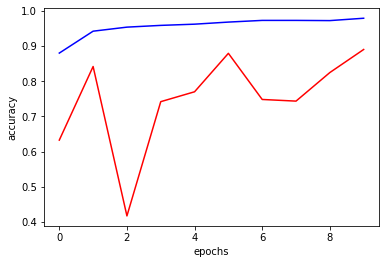

In [170]:
plt.plot(range(len(accuracy)),accuracy,color='blue')
plt.plot(range(len(val_accuracy)),val_accuracy,color='red')

plt.xlabel('epochs')
plt.ylabel('accuracy')

In [190]:
image=tf.keras.preprocessing.image.load_img('chest_xray/test/PNEUMONIA/person1_virus_6.jpeg',target_size=(256,256,3))
image=tf.keras.preprocessing.image.img_to_array(image)

In [222]:
predictions=model.predict(testing_data_generator)

In [224]:
predictions[:10]

array([[9.9999988e-01],
       [1.0000000e+00],
       [1.1470148e-06],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9689001e-01],
       [1.0000000e+00],
       [3.0950560e-16],
       [1.0000000e+00],
       [2.4607061e-14]], dtype=float32)

In [225]:
testing_data_generator[0][1]

array([1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1.],
      dtype=float32)

In [220]:
for file in os.listdir('chest_xray/test/NORMAL'):
    image=tf.keras.preprocessing.image.load_img('chest_xray/test/NORMAL/'+file,target_size=(256,256,3))
    image=tf.keras.preprocessing.image.img_to_array(image)
    print(model.predict(image.reshape(1,256,256,3)))

[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]

# layer outputs

In [113]:
image=tf.keras.preprocessing.image.load_img('chest_xray/train/NORMAL/IM-0115-0001.jpeg',target_size=(256,256,3))

In [115]:
image=tf.keras.preprocessing.image.img_to_array(image)

In [127]:
base_model_output=base_model(image.reshape(1,256,256,3))

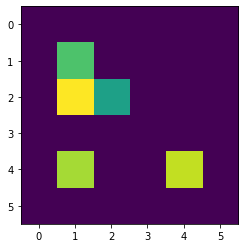

In [128]:
plt.imshow(base_model_output[0,:,:,1])

# extra

In [37]:
image=tf.keras.preprocessing.image.load_img('chest_xray/train/NORMAL/IM-0115-0001.jpeg',grayscale=False,target_size=(256,256))

In [38]:
image=tf.keras.preprocessing.image.img_to_array(image)

In [78]:
image=image/255.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


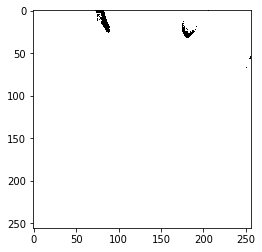

In [167]:
plt.imshow(image[:,:,:])

In [77]:
assert(np.all(image[:,:,2])==np.all(image[:,:,0]))